In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import HTML, Image
import networkx as nx
import plotly as py 
import ipywidgets as widgets 

py.offline.init_notebook_mode(connected=True)

### 1. Highlight the top ingrediants for each cuisine from the main data set and drop the rest here
### 2. Predict Cuisine based on the given ingredients

#  




# problem 1



In [2]:
everything = pd.read_json('Whats_cooking/train.json')
print(everything.shape)

(39774, 3)


In [3]:
everything.head(30)

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge..."
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli..."
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo..."
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por..."
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-..."


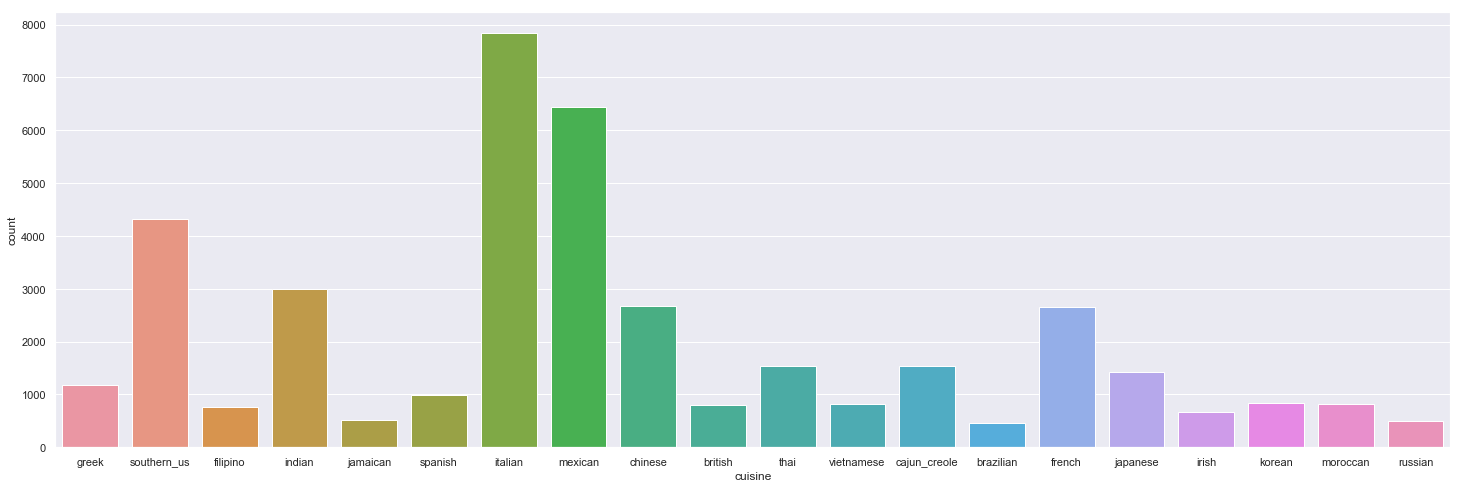

In [4]:
f, axes = plt.subplots(1, 1, figsize=(25, 8))
sb.countplot(everything["cuisine"])

In [5]:
ingredientData = pd.DataFrame(everything[['ingredients']])
ingredientData.head()

,ingredients
0,"[romaine lettuce, black olives, grape tomatoes..."
1,"[plain flour, ground pepper, salt, tomatoes, g..."
2,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,"[water, vegetable oil, wheat, salt]"
4,"[black pepper, shallots, cornflour, cayenne pe..."


In [6]:
ingredientList = []
for i in range(0,39774):
    for ingredient in ingredientData.iloc[i][0]:
        if ingredient not in ingredientList:
            ingredientList.append(ingredient)

In [7]:
len(ingredientList)

6714

In [8]:
cuisineList = []
for i in range(0,39774):
    if everything['cuisine'].iloc[i] not in cuisineList:
        cuisineList.append(everything['cuisine'].iloc[i])

In [9]:
print(cuisineList)
print()
print(everything['cuisine'].iloc[0])

['greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai', 'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese', 'irish', 'korean', 'moroccan', 'russian']

greek


In [10]:
everything_dict = {'ingredients':ingredientList}
for cuisine in cuisineList:
    everything_dict[cuisine] = []
    for i in range(0,len(ingredientList)):
        everything_dict[cuisine].append(0)

In [11]:
for cuisine in cuisineList:
    for i in range(0,39774):
        if everything['cuisine'].iloc[i]== cuisine:
            for ingredient in everything['ingredients'].iloc[i]:
                for index in range(0,len(ingredientList)):
                    if ingredientList[index]== ingredient:
                        everything_dict[cuisine][index]+=1
                    
        

In [12]:
completeDataFrame = pd.DataFrame(everything_dict)
completeDataFrame = completeDataFrame.set_index('ingredients')
completeDataFrame

,greek,southern_us,filipino,indian,jamaican,spanish,italian,mexican,chinese,british,thai,vietnamese,cajun_creole,brazilian,french,japanese,irish,korean,moroccan,russian
ingredients,,,,,,,,,,,,,,,,,,,,
romaine lettuce,39,8,0,3,0,4,33,103,13,0,20,17,12,0,12,0,1,5,0,0
black olives,31,3,0,0,0,4,67,92,0,0,0,0,2,0,21,0,0,0,8,1
grape tomatoes,26,14,1,5,0,6,98,53,2,0,4,0,5,0,13,1,0,0,0,0
garlic,216,259,325,726,139,128,1471,1317,763,34,414,239,370,82,214,166,51,303,143,20
pepper,203,549,199,205,125,133,965,806,158,88,81,71,189,56,209,62,87,99,94,59
purple onion,186,95,13,170,26,55,350,618,33,11,84,45,38,8,64,14,3,8,67,8
seasoning,3,17,2,5,4,2,12,31,11,2,4,2,25,1,1,5,2,5,2,1
garbanzo beans,23,1,5,36,0,9,18,17,1,0,1,0,2,0,1,0,0,0,34,0
feta cheese crumbles,252,3,0,3,0,3,68,18,1,0,0,0,1,0,3,0,0,0,6,0


# Dropping The Common Ingredients

In [13]:
completeDataFrameWithoutSalt=completeDataFrame.drop(['onions','olive oil','water','garlic','sugar','garlic cloves','butter','ground black pepper','all-purpose flour','pepper','vegetable oil'])

## Find out 3 least used ingredients, remove commonly used ingredients, most used ingredients, find out 3 most used ingredients in each cuisine

# Exploratory Analysis

In [14]:
completeDataFrameWithoutSalt.dtypes

greek           int64
southern_us     int64
filipino        int64
indian          int64
jamaican        int64
spanish         int64
italian         int64
mexican         int64
chinese         int64
british         int64
thai            int64
vietnamese      int64
cajun_creole    int64
brazilian       int64
french          int64
japanese        int64
irish           int64
korean          int64
moroccan        int64
russian         int64
dtype: object

In [15]:
total_top15_ingredients = []

for cuisines in cuisineList: 
    ordered_df_All = completeDataFrameWithoutSalt[cuisines].sort_values(ascending = False)
    ordered_df = ordered_df_All[:15]
    
    for i in ordered_df.index:
        if i not in total_top15_ingredients:
            total_top15_ingredients.append(i)

In [16]:
def plot_lollipop_treemap(cuisine, total_top15_ingredients = total_top15_ingredients): 
    
    f, axes = plt.subplots(1, 1, figsize=(30, 10))
    # Reorder it following the values(top 10 ingredients):
    ordered_df_All = completeDataFrameWithoutSalt[cuisine].sort_values(ascending = False)
    ordered_df = ordered_df_All[:15]
    my_range=range(0,15)

    # Make the plot
    plt.stem(ordered_df)
    plt.xticks( my_range, ordered_df.index)
    
    values= ordered_df
    type_list = ordered_df.index
    import squarify

    x = 0.
    y = 0.
    width = 50.
    height = 50.


    normed = squarify.normalize_sizes(values, width, height)
    rects = squarify.squarify(normed, x, y, width, height)

    # Choose colors from http://colorbrewer2.org/ under "Export"
    color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB','#BAA898','#BFD7EA','#685044','#E9AFA3','#99B2DD','#F9DEC9','#3A405A','#494949','#FF5D73','#7C7A7A','#CF5C36','#EFC88B']
    shapes = []
    annotations = []
    counter = 0

    for r in rects:
        shapes.append( 
            dict(
                type = 'rect', 
                x0 = r['x'], 
                y0 = r['y'], 
                x1 = r['x']+r['dx'], 
                y1 = r['y']+r['dy'],
                line = dict( width = 2 ),
                fillcolor = color_brewer[counter]
            ) 
        )
        annotations.append(
            dict(
                x = r['x']+(r['dx']/2),
                y = r['y']+(r['dy']/2),
                text = "{}-{}".format(type_list[counter], values[counter]),
                showarrow = False
            )
        )
        counter = counter + 1
        if counter >= len(color_brewer):
            counter = 0

    # For hover text
    trace0 = go.Scatter(
        x = [ r['x']+(r['dx']/2) for r in rects ], 
        y = [ r['y']+(r['dy']/2) for r in rects ],
        text = [ str(v) for v in values ], 
        mode = 'text',
    )

    layout = dict(
        height=1000, 
        width=1000,
        xaxis=dict(showgrid=False,zeroline=False),
        yaxis=dict(showgrid=False,zeroline=False),
        shapes=shapes,
        annotations=annotations,
        hovermode='closest',
        font=dict(color="#FFFFFF")
    )

    # With hovertext
    figure = dict(data=[trace0], layout=layout)
    # iplot(figure, filename='squarify-treemap') 
    py.offline.iplot(figure)

In [17]:
cuisine = widgets.Dropdown(
    options = cuisineList, 
    value = 'greek', 
    description = 'Cuisine', 
    disabled = False
)

widgets.interactive(plot_lollipop_treemap, cuisine = cuisine, total_top15_ingredients = widgets.fixed(total_top15_ingredients))

interactive(children=(Dropdown(description='Cuisine', options=('greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai', 'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese', 'irish', 'korean', 'moroccan', 'russian'), value='greek'), Output()), _dom_classes=('widget-interact',))

# What's the relationship between each countries?

i got all top 15 for each cuisine. Create a new dictionary of all top ingredients and cuisine. Show


# How Cuisine are connected by top food

In [18]:
top_ingredients_dict = {'ingredients':total_top15_ingredients}
for cuisine in cuisineList:
    top_ingredients_dict[cuisine] = []
    for i in range(0,len(total_top15_ingredients)):
        top_ingredients_dict[cuisine].append(0)

In [19]:
#create dict to show the prescence of the top 15 food in each cuisine
for cuisine in completeDataFrameWithoutSalt.columns:
    ordered_df_All = completeDataFrameWithoutSalt[cuisine].sort_values(ascending = False)
    ordered_df = ordered_df_All[:15]
    for ingredients in ordered_df.index:
        for i in range(0,len(total_top15_ingredients)):
            if ingredients == total_top15_ingredients[i]:
                top_ingredients_dict[cuisine][i]=1
                break

In [20]:
# 1 = present, 0 = false
top_df = pd.DataFrame(top_ingredients_dict)
top_df.set_index('ingredients') 

,greek,southern_us,filipino,indian,jamaican,spanish,italian,mexican,chinese,british,thai,vietnamese,cajun_creole,brazilian,french,japanese,irish,korean,moroccan,russian
ingredients,,,,,,,,,,,,,,,,,,,,
salt,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
dried oregano,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
feta cheese crumbles,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
extra-virgin olive oil,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0
fresh lemon juice,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
feta cheese,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
cucumber,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
purple onion,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
lemon juice,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
#create dict for all the cuisine connection
network_dict = {'from':[],'to':[],'value':[]}
for cuisine1 in top_df.columns:
    for cuisine2 in top_df.columns:
        value = 0
        if (cuisine1 != cuisine2) and cuisine2 not in network_dict['from'] :
            for i in range(0,len(total_top15_ingredients)):
                if top_df[cuisine1][i] == 1 and top_df[cuisine2][i] == 1:
                    value +=1
        if value>=5:                              #have at least 5 common ingredients
            network_dict['from'].append(cuisine1)
            network_dict['to'].append(cuisine2)
            network_dict['value'].append(value)
    

In [22]:
network_df = pd.DataFrame(network_dict)
network_df

,from,to,value
0,greek,spanish,6
1,greek,italian,6
2,southern_us,spanish,5
3,southern_us,italian,6
4,southern_us,british,10
5,southern_us,french,7
6,southern_us,irish,10
7,southern_us,russian,8
8,filipino,jamaican,5
9,filipino,chinese,8


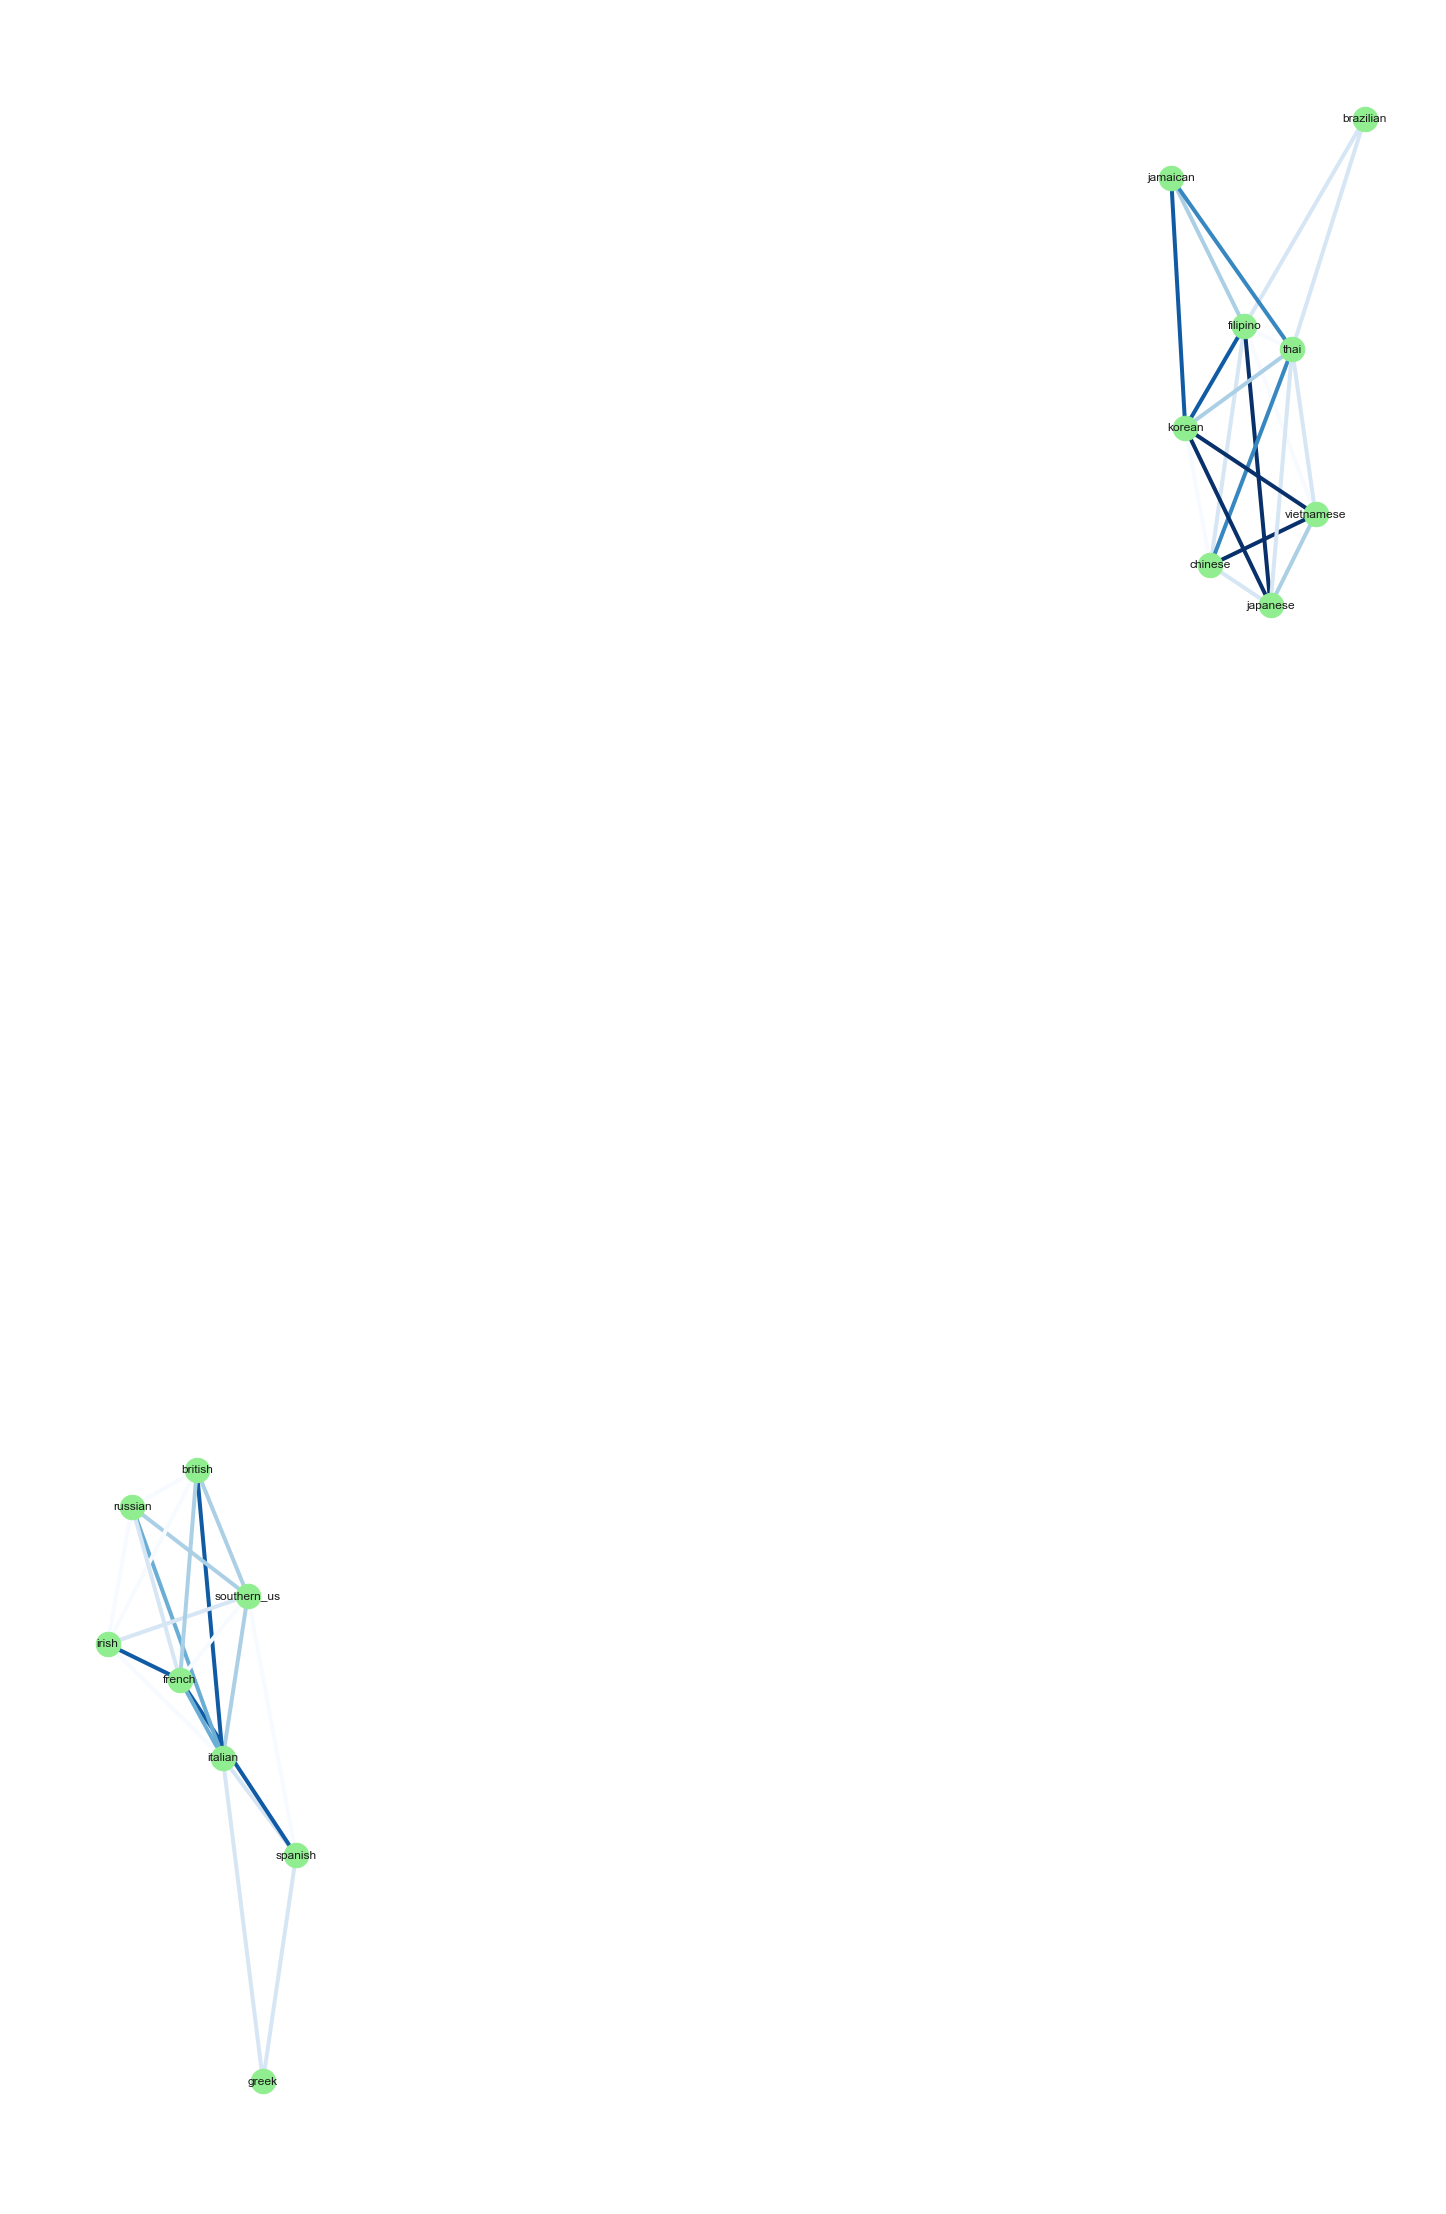

In [23]:
f, axes = plt.subplots(1, 1, figsize=(25, 40))

# Build your graph
G=nx.from_pandas_edgelist(network_df, 'from', 'to', create_using=nx.Graph() )

# Custom the nodes:
nx.draw(G, with_labels=True, node_color='lightgreen', node_size=600, edge_color=network_df['value'], width=4.0, edge_cmap=plt.cm.Blues)

In [24]:
#create dict for all the cuisine connection
network1_dict = {'from':[],'to':[],'value':[]}
for cuisine1 in top_df.columns:
    for cuisine2 in top_df.columns:
        value = 0
        if (cuisine1 != cuisine2):
            for i in range(0,len(total_top15_ingredients)):
                if top_df[cuisine1][i] == 1 and top_df[cuisine2][i] == 1:
                    value +=1
        if value>=5:                              #have at least 5 common ingredients
            network1_dict['from'].append(cuisine1)
            network1_dict['to'].append(cuisine2)
            network1_dict['value'].append(value)

In [25]:
network1_df = pd.DataFrame(network1_dict)
network1_df

,from,to,value
0,greek,spanish,6
1,greek,italian,6
2,southern_us,spanish,5
3,southern_us,italian,6
4,southern_us,british,10
5,southern_us,french,7
6,southern_us,irish,10
7,southern_us,russian,8
8,filipino,jamaican,5
9,filipino,chinese,8


In [26]:
def plot_networkgraph(cuisine, network1_df = network1_df): 
    cuisine_df = network1_df.loc[network1_df['from'] == cuisine]
            
    f, axes = plt.subplots(1, 1, figsize=(30, 20))

    # Build your graph
    G=nx.from_pandas_edgelist(cuisine_df[:], 'from', 'to', create_using=nx.Graph() )

    # Custom the nodes:
    nx.draw(G, with_labels=True, node_color='lightgreen', node_size=600, edge_color=cuisine_df[:]['value'], width=4.0, edge_cmap=plt.cm.Blues)


In [27]:
cuisine = widgets.Dropdown(
    options = cuisineList, 
    value = 'greek', 
    description = 'Cuisine', 
    disabled = False
)

widgets.interactive(plot_networkgraph, cuisine = cuisine, network1_df = widgets.fixed(network1_df))

interactive(children=(Dropdown(description='Cuisine', options=('greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai', 'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese', 'irish', 'korean', 'moroccan', 'russian'), value='greek'), Output()), _dom_classes=('widget-interact',))

# Problem 2, Predicting Cuisine

In [28]:
#import test and train file
everything = pd.read_json('Whats_cooking/train.json')
test = pd.read_json('Whats_cooking/test.json')

In [29]:
#making a dict of ingredients with their total used times in the data set
ingredientData = pd.DataFrame(everything[['ingredients']])
ingredientDict = {}
for i in range(0,39774):
    for ingredient in ingredientData.iloc[i][0]:
        if ingredient not in ingredientDict.keys():
            ingredientDict[ingredient] = 1
        else:
            ingredientDict[ingredient]+=1

In [30]:
#sorting the dictionary according to its value
sorted_dict={}
sorted_keys=sorted(ingredientDict, key=ingredientDict.get, reverse=True)
for r in sorted_keys:
    sorted_dict[r]= ingredientDict[r]

In [31]:
#removing the common ingredients
useless=[]
for key in sorted_dict.keys():
    useless.append(key)
    if len(useless)==12:
        break
for i in useless:
    del sorted_dict[i]

In [32]:
#getting the top 100 ingredients
top100=[]
for key in sorted_dict.keys():
    top100.append(key)
    if len(top100)==100:
        break

In [33]:
top100

['eggs',
 'soy sauce',
 'kosher salt',
 'green onions',
 'tomatoes',
 'large eggs',
 'carrots',
 'unsalted butter',
 'ground cumin',
 'extra-virgin olive oil',
 'black pepper',
 'milk',
 'chili powder',
 'oil',
 'red bell pepper',
 'purple onion',
 'scallions',
 'grated parmesan cheese',
 'sesame oil',
 'corn starch',
 'ginger',
 'baking powder',
 'jalapeno chilies',
 'dried oregano',
 'chopped cilantro fresh',
 'fresh lemon juice',
 'diced tomatoes',
 'fresh parsley',
 'minced garlic',
 'chicken broth',
 'sour cream',
 'cayenne pepper',
 'fresh ginger',
 'brown sugar',
 'cooking spray',
 'shallots',
 'garlic powder',
 'lime',
 'lemon juice',
 'fresh lime juice',
 'flour',
 'honey',
 'vanilla extract',
 'paprika',
 'chopped onion',
 'fish sauce',
 'ground cinnamon',
 'avocado',
 'canola oil',
 'dry white wine',
 'lemon',
 'rice vinegar',
 'yellow onion',
 'green bell pepper',
 'cilantro leaves',
 'tomato paste',
 'heavy cream',
 'cilantro',
 'fresh basil',
 'boneless skinless chicken b

In [34]:
# extracted into csv already
#creating a new dataset for Machine Learning
# mlDict = {}
# for top_ingredient in top100:
#     mlDict[top_ingredient]=[]
#     for i in range(0,39774):
#         if top_ingredient in everything.iloc[i]['ingredients']:
#             mlDict[top_ingredient].append(1)
#         else:
#             mlDict[top_ingredient].append(0)

In [35]:
# cuisine = []
# id_=[]
# for i in range(0,39774):
#         cuisine.append(everything.iloc[i]['cuisine'])
#         id_.append(everything.iloc[i]['id'])
# mlDict['id']=id_
# mlDict['cuisine']= cuisine


In [36]:
# mlDF=pd.DataFrame(mlDict)
# mlDF['cuisine'] = mlDF['cuisine'].astype('category')
# mlDF[top100] = mlDF[top100].astype('category')

In [37]:
# extract into CSV file
#machine_learning_csv = mlDF.to_csv (r'C:\Users\limka\OneDrive\Documents\NTU\Y1S2\CZ1015\Mini Project\machine_learning_csv.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

In [38]:
mlDF = pd.read_csv('machine_learning_csv.csv')
mlDF

,eggs,soy sauce,kosher salt,green onions,tomatoes,large eggs,carrots,unsalted butter,ground cumin,extra-virgin olive oil,...,chopped cilantro,chicken breasts,mayonaise,shredded cheddar cheese,green chilies,ground coriander,cucumber,whole milk,id,cuisine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10259,greek
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25693,southern_us
2,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,20130,filipino
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,22213,indian
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,13162,indian
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6602,jamaican
6,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,42779,spanish
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3735,italian
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,16903,mexican
9,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,12734,italian


# Multiclass Classification Tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.23419821994267612



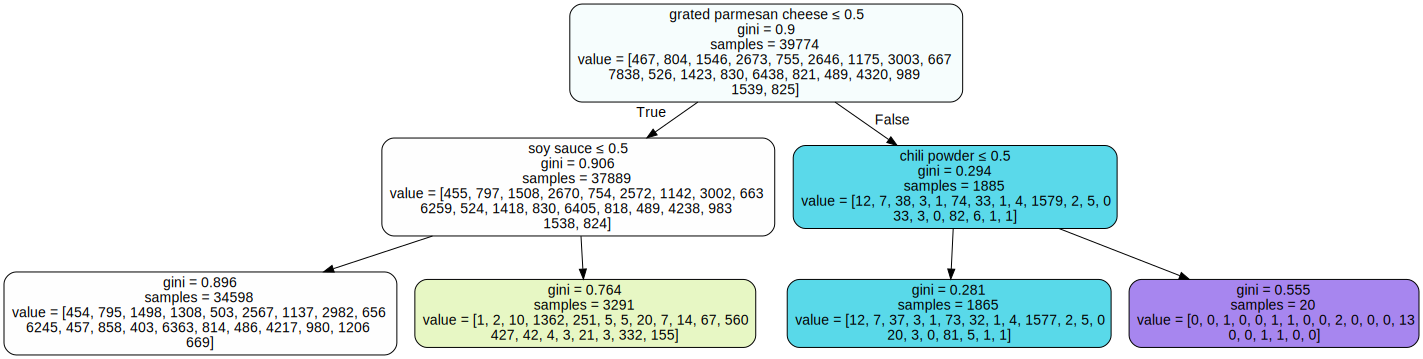

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Recall the Legendary-Total Dataset
y_train = pd.DataFrame(mlDF['cuisine'])   # Response
X_train = pd.DataFrame(mlDF[top100])       # Predictor

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)


# Increasing Max Depth

In [40]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 100)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7865942575551869



In [41]:
cuisine_pred = mlDF[mlDF["id"].isin(["11462", "40989", "27976", '22213','6487','25557','27976','1299'])]
cuisine_pred

,eggs,soy sauce,kosher salt,green onions,tomatoes,large eggs,carrots,unsalted butter,ground cumin,extra-virgin olive oil,...,chopped cilantro,chicken breasts,mayonaise,shredded cheddar cheese,green chilies,ground coriander,cucumber,whole milk,id,cuisine
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,22213,indian
22,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,40989,southern_us
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,27976,cajun_creole
29,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1299,mexican
39761,0,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,6487,chinese
39766,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,25557,irish
39770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11462,italian


In [42]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(cuisine_pred[top100])

# Predict Response corresponding to Predictors
y_pred = dectree.predict(X_pred)

# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["PredType"], index = cuisine_pred.index)
predictedDF = pd.concat([cuisine_pred[['id','cuisine']], y_pred], axis = 1)

predictedDF

,id,cuisine,PredType
3,22213,indian,italian
22,40989,southern_us,italian
26,27976,cajun_creole,cajun_creole
29,1299,mexican,mexican
39761,6487,chinese,chinese
39766,25557,irish,irish
39770,11462,italian,italian


In [43]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest using Train Data
clf = RandomForestClassifier(n_jobs=2,n_estimators=100, random_state=0)  # create the  object
clf.fit(X_train, y_train)                    # train the model

y_train_pred = clf.predict(X_train)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", clf.score(X_train, y_train))
print()


C:\Users\limka\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7865942575551869



In [44]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(cuisine_pred[top100])

# Predict Response corresponding to Predictors
y_pred = clf.predict(X_pred)

# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["PredType"], index = cuisine_pred.index)
predictedDF = pd.concat([cuisine_pred[['id','cuisine']], y_pred], axis = 1)

predictedDF

,id,cuisine,PredType
3,22213,indian,italian
22,40989,southern_us,italian
26,27976,cajun_creole,cajun_creole
29,1299,mexican,mexican
39761,6487,chinese,chinese
39766,25557,irish,irish
39770,11462,italian,italian


# Using For Test set

In [45]:
#creating a test dataset for Machine Learning
testdict = {}
for top_ingredient in top100:
    testdict[top_ingredient]=[]
    for i in range(0,9944):
        if top_ingredient in test.iloc[i]['ingredients']:
            testdict[top_ingredient].append(1)
        else:
            testdict[top_ingredient].append(0)

In [46]:
id_=[]
for i in range(0,9944):
        id_.append(test.iloc[i]['id'])
testdict['id']=id_

In [47]:
testDF=pd.DataFrame(testdict)
testDF[top100] = testDF[top100].astype('category')

In [48]:
#classification Tree
cuisine_pred = testDF[testDF["id"].isin([ 36914,2280,14729,4594,2237,45631,45523,4977,7124,])]
X_pred = pd.DataFrame(cuisine_pred[top100])

# Predict Response corresponding to Predictors
y_pred = dectree.predict(X_pred)

# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["PredType"], index = cuisine_pred.index)
predictedDF = pd.concat([cuisine_pred[['id']], y_pred], axis = 1)

predictedDF

,id,PredType
246,36914,french
247,2280,southern_us
248,14729,italian
249,4594,italian
250,2237,mexican
251,45631,indian
287,45523,british
289,7124,french


In [49]:
#random forest
cuisine_pred = testDF[testDF["id"].isin([ 36914,2280,14729,4594,2237,45631,45523,4977,7124,])]
X_pred = pd.DataFrame(cuisine_pred[top100])

# Predict Response corresponding to Predictors
y_pred = clf.predict(X_pred)

# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(y_pred, columns = ["PredType"], index = cuisine_pred.index)
predictedDF = pd.concat([cuisine_pred[['id']], y_pred], axis = 1)

predictedDF

,id,PredType
246,36914,french
247,2280,southern_us
248,14729,italian
249,4594,italian
250,2237,mexican
251,45631,indian
287,45523,british
289,7124,french
